In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:

grs=open('gestures.txt','r')
folders=grs.read().split(',')
folders

['spiderman_gesture', 'gun_gesture', 'call_me_gesture']

In [3]:
path=Path('dataset')
fns = get_image_files(path)
failed=verify_images(fns)
failed

(#0) []

In [4]:
gestures = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
    )

In [5]:
dls = gestures.dataloaders(path)
dlc = gestures.datasets(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


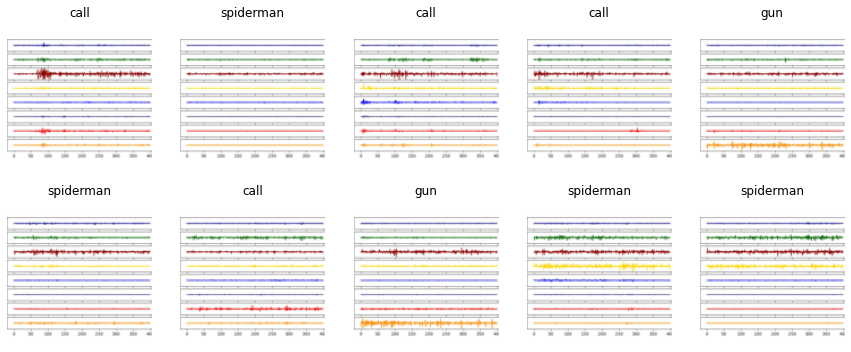

In [6]:
dls.valid.show_batch(max_n=10, nrows=2)

In [7]:
defaults.device= torch.device("cuda")

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate) 
learn.fit_one_cycle(30)

C:\Users\leona\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.948551,1.966429,0.568627,00:09
1,1.679157,1.071342,0.549020,00:08
2,1.547078,0.858248,0.411765,00:08
3,1.405137,0.708787,0.372549,00:08
4,1.255294,0.571924,0.274510,00:08
5,1.106068,0.517787,0.235294,00:08
6,0.991733,0.465421,0.196078,00:08
7,0.882757,0.389997,0.176471,00:08
8,0.799540,0.244528,0.137255,00:08
9,0.721421,0.159650,0.058824,00:08


In [9]:
learn.unfreeze()

SuggestedLRs(valley=9.120108734350652e-05)

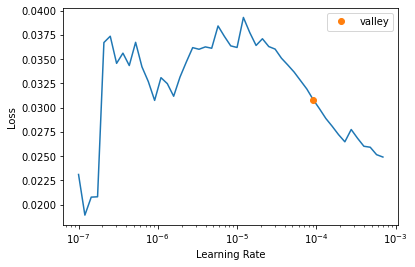

In [10]:
learn.lr_find()

In [11]:
learn.fit_one_cycle(20,9.120108734350652e-05)

epoch,train_loss,valid_loss,error_rate,time
0,0.041888,0.044267,0.019608,00:11
1,0.044581,0.025686,0.019608,00:11
2,0.033129,0.010534,0.000000,00:11
3,0.029931,0.004644,0.000000,00:10
4,0.028955,0.006583,0.000000,00:11
5,0.028613,0.008026,0.000000,00:11
6,0.031695,0.035796,0.039216,00:11
7,0.029111,0.137099,0.058824,00:11
8,0.027779,0.026442,0.000000,00:10
9,0.026085,0.002222,0.000000,00:10


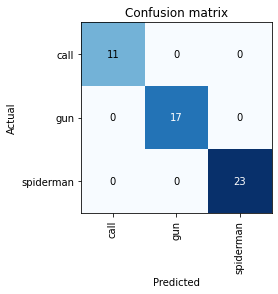

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

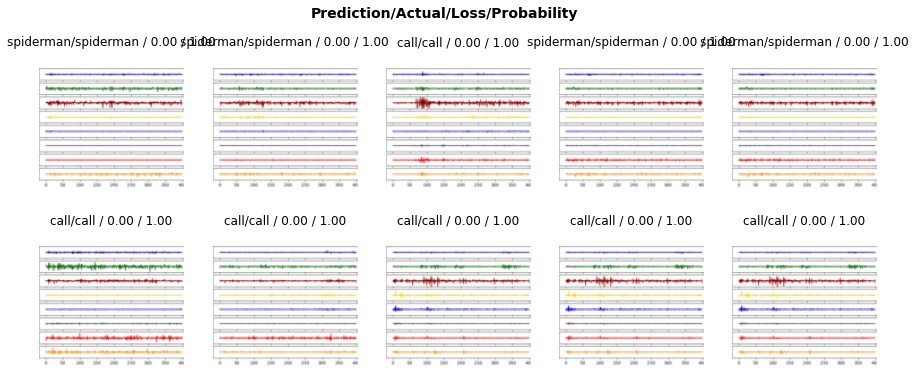

In [13]:
interp.plot_top_losses(10, nrows=2)

In [14]:
learn.export()

d:\Programming\MYO-Armband\Myo Proyect\gesture_recorder.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8,1,i+1)
d:\Programming\MYO-Armband\Myo Proyect\gesture_recorder.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(8,1,i+1)
d:\Programming\MYO-Armband\Myo Proyect\gesture_recorder.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

call
tensor([0.6648, 0.0661, 0.2690])


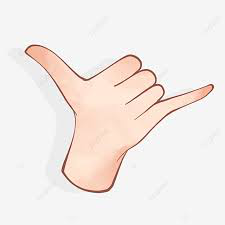

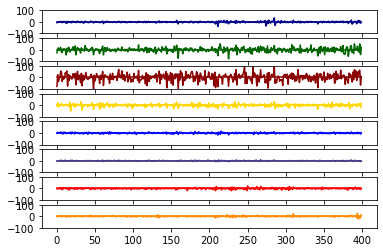

In [20]:
from gesture_recorder import  record
from termcolor import colored

record('Test_img',2)

path=f"Test_img.jpg"
im = Image.open(path)
learn_inf = load_learner('export.pkl', cpu=True)
pred,pred_idx,probs = learn_inf.predict(path)
print(colored(pred,'green'))
print(probs)
im.to_thumb(256,256)

if pred=='spiderman':
    im = Image.open('gest_images/spiderman.jpg')
    
if pred=='call':
    im = Image.open('gest_images/call.jpg')

if pred=='gun':
    im = Image.open('gest_images/gun.png')

im.to_thumb(256,256)
